In [24]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer()
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

# def checkDepthScores(minsize=1, maxsize=10):
#     result_list = []
#     for i in range(maxsize-minsize):
#         tree_clf = DecisionTreeClassifier(max_depth=minsize+i, random_state=42)
#         X = data_breast_cancer.data[:, [1, 8]]
#         y = data_breast_cancer.target
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#         tree_clf.fit(X_train, y_train)
#         trainscore = tree_clf.score(X_train, y_train)
#         tree_clf.fit(X_test, y_test)
#         testscore = tree_clf.score(X_test, y_test)
#         f1 = tree_clf.predict(X_train)
#         f2 = tree_clf.predict(X_test)
#         print(f1, f2)
#         print('trainscore:', trainscore)
#         print('testscore:', testscore)
#         result_list.append((trainscore+testscore)/2)
#     print(result_list)
#     return min(result_list)

    

In [26]:
#print(checkDepthScores())
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
X = data_breast_cancer.data[:, [1, 8]]
y = data_breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_clf.fit(X_train, y_train)
#print(tree_clf.score(X, y))
str_dot = export_graphviz(tree_clf, out_file=None, feature_names=['mean texture', 'mean symmetry'], class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(str_dot)
graph.render(filename='bc', format='png')
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, tree_clf.predict(X_train))
accuracy_test = accuracy_score(y_test, tree_clf.predict(X_test))

#print(f1_train, f1_test, accuracy_train, accuracy_test)
#print(str_dot)
pkl_list = [3, f1_train, f1_test, accuracy_train, accuracy_test]

In [27]:
import pickle
with open("f1acc_tree.pkl", "wb") as file:
    pickle.dump(pkl_list, file)

<Axes: xlabel='x', ylabel='y'>

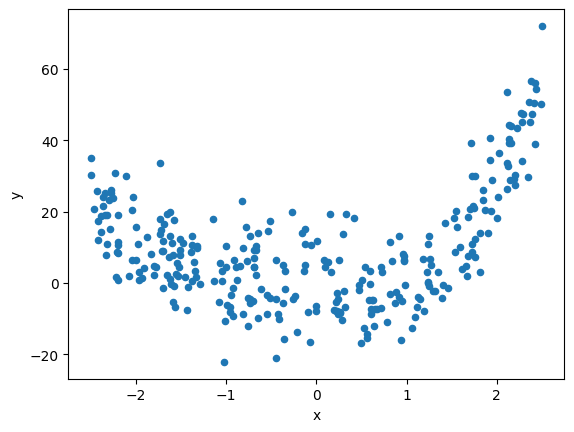

In [28]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=42)

tree_clf = DecisionTreeRegressor(max_depth=4, random_state=42)

tree_clf.fit(X_train, y_train)

y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [30]:
str_dot = export_graphviz(tree_clf, out_file=None,
                rounded=True,
                filled=True)
graph = graphviz.Source(str_dot)

graph.render(filename='reg', format='png')

pkl_list2 = [4, mse_train, mse_test]
with open("mse_tree.pkl", "wb") as file:
    pickle.dump(pkl_list2, file)